# Simulation of Stochastic Population Growth

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mpl_config

In [2]:
# give birth 0.5 per year
b = 0.5
# initial population is 10
n0 = 10
# simulation period
n_years = 10
# simulation step
dt = 0.1

## A single trajectory

In [3]:
n = n0
n_list = [n]
t_list = [0]
for i in range(round(n_years / dt)):
    give_birth = np.random.rand(n) < (b * dt)
    n += np.sum(give_birth)
    t_list.append(i * dt)
    n_list.append(n)

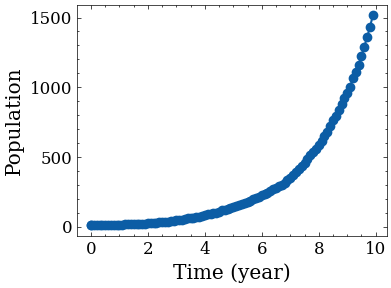

In [4]:
plt.plot(t_list, n_list, marker="o")
plt.xlabel("Time (year)")
plt.ylabel("Population")
plt.show()

Problems
- Can we choose a natural `dt` such as 1?
- What is the difference with solving IVP? Can we use the library from SciPy?

## Multiple trajectories

In [5]:
n_traj = 7

In [6]:
n_list_list = []
t_list = np.arange(round(n_years / dt) + 1) * dt
for i in range(n_traj):
    n = n0
    n_list = [n]
    for j in range(round(n_years / dt)):
        give_birth = np.random.rand(n) < (b * dt)
        n += np.sum(give_birth)
        n_list.append(n)
    n_list_list.append(n_list)

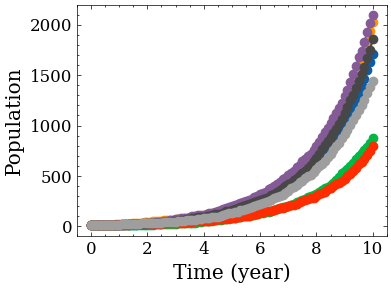

In [7]:
for i in range(n_traj):
    plt.plot(t_list, n_list_list[i], marker="o")
plt.xlabel("Time (year)")
plt.ylabel("Population")
plt.show()

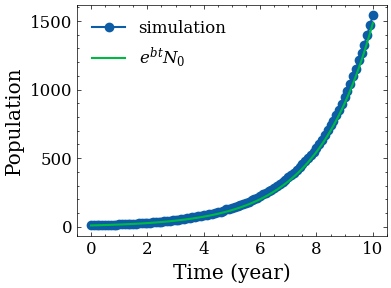

In [8]:
# checking the mean
plt.plot(t_list, np.mean(n_list_list, axis=0), marker="o", label="simulation")
t_list = np.array(t_list)
plt.plot(t_list, n0 * np.exp(b * t_list), label="$e^{bt}N_0$")
plt.xlabel("Time (year)")
plt.ylabel("Population")
plt.legend()
plt.show()

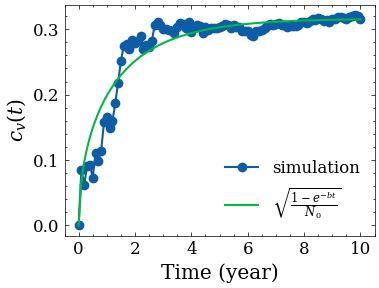

In [9]:
# checking the coefficient of variation
plt.plot(t_list, np.std(n_list_list, axis=0) / np.mean(n_list_list, axis=0), marker="o", label="simulation")
t_list = np.array(t_list)
plt.plot(t_list, np.sqrt((1 - np.exp(- b * t_list)) / n0), label=r"$\sqrt{\frac{1-e^{-bt}}{N_0}}$")
plt.xlabel("Time (year)")
plt.ylabel("$c_v(t)$")
plt.legend()
plt.show()

Problems
- How does step size affect the result?
- What is the implication of the coefficient of variance?
- How does the number of trajectories affect the result?
- What is the best suited scale for the $y$ axis?